In [ ]:
%pip install pyod
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=52de1fadf431f4356ff0552bb9f4657661825c6dbd77b852269075fccb45b7ef
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
channels = 32
seconds = 0.5    # Size of each segment we want
fs = 256.0         # Dtaset eeg sampling rate
data_portion = 1
save_model = False

In [ ]:
df = pd.read_csv('/content/emotions (2).csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


The x-axis shows the frequency of the EEG signal, and the y-axis shows the power of the EEG signal at each frequency

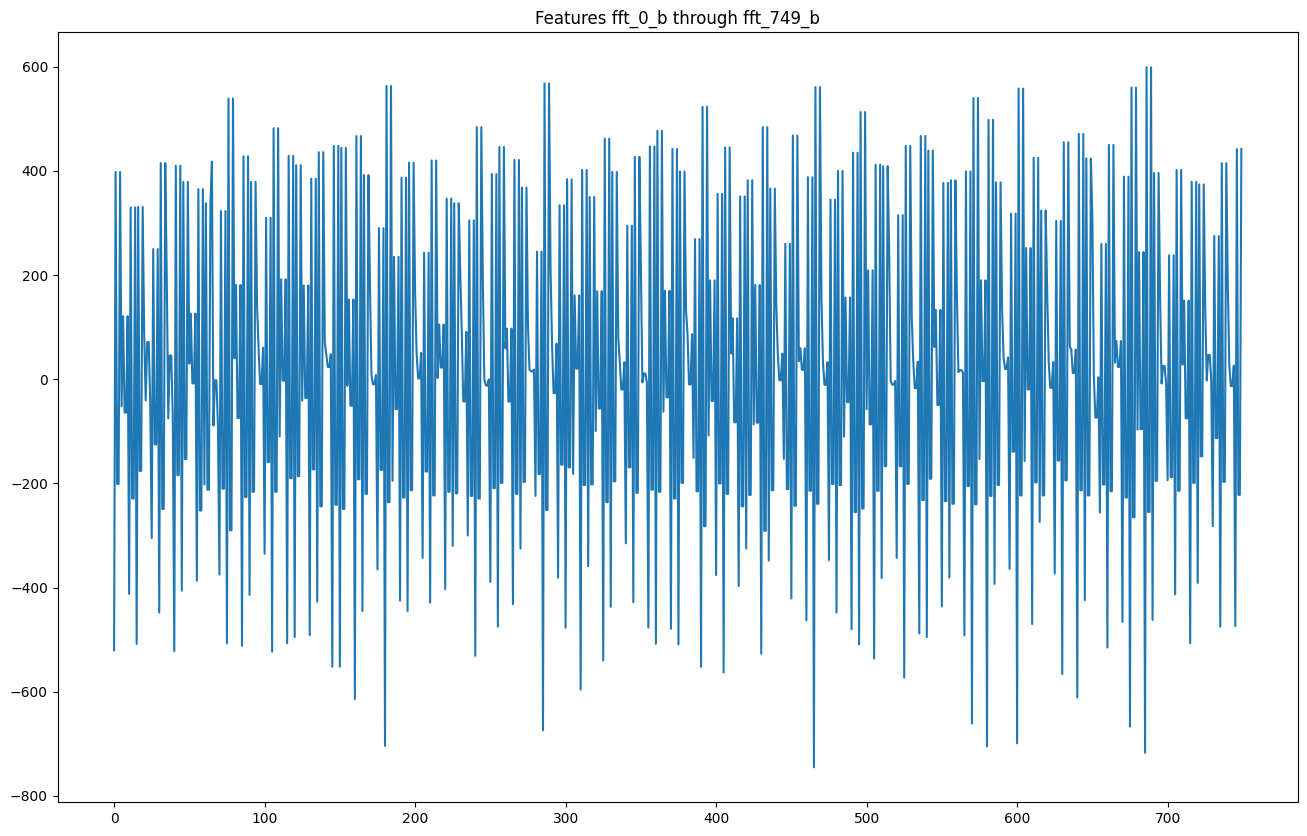

In [ ]:
sample = df.loc[0, 'fft_0_a':'fft_749_a']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

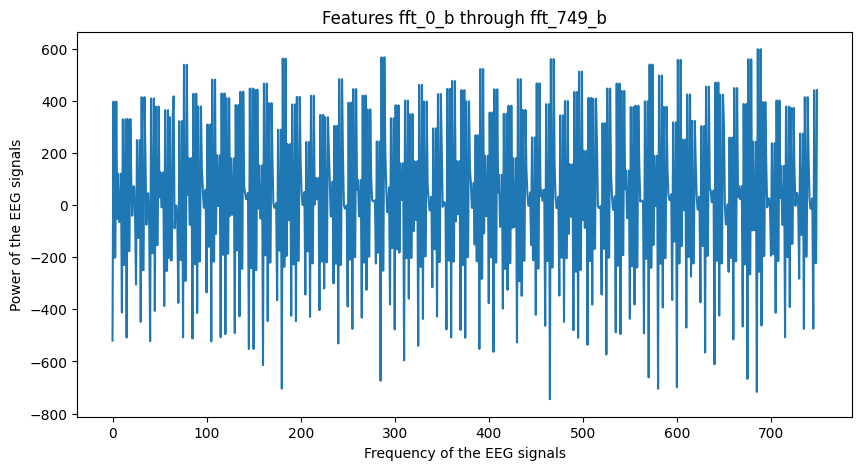

In [ ]:
sample = df.loc[0, 'fft_0_a':'fft_749_a']
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.xlabel("Frequency of the EEG signals")  # X-axis label
plt.ylabel("Power of the EEG signals")    # Y-axis label
plt.show()


In [ ]:
data = pd.read_csv("/content/emotions (2).csv")
len(data)
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

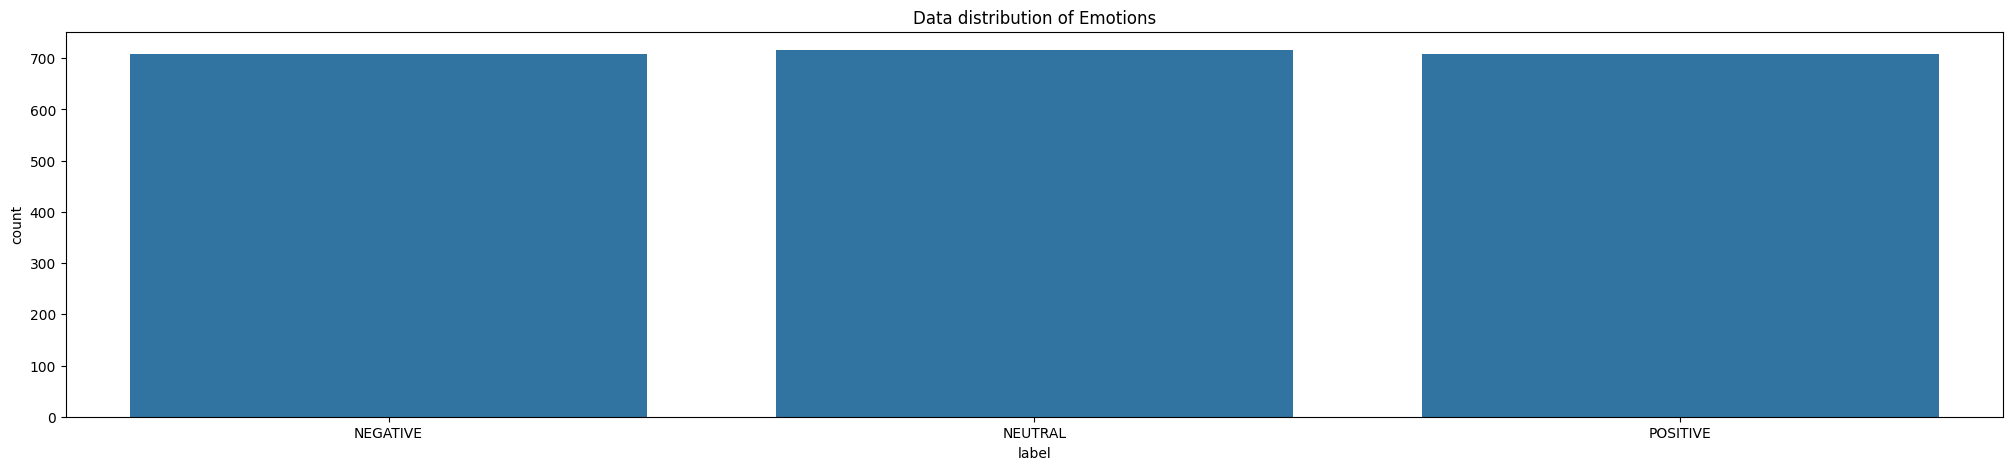

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,5))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

<ipython-input-2-39784ab41400>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(label_mapping)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7197 - loss: 0.6907 - val_accuracy: 0.9357 - val_loss: 0.1909
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9152 - loss: 0.2197 - val_accuracy: 0.9298 - val_loss: 0.1677
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9351 - loss: 0.1807 - val_accuracy: 0.9298 - val_loss: 0.1246
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9401 - loss: 0.1461 - val_accuracy: 0.9532 - val_loss: 0.1317
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9376 - loss: 0.1273 - val_accuracy: 0.9415 - val_loss: 0.1648
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9671 - loss: 0.0857 - val_accuracy: 0.9825 - val_loss: 0.0602
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9828 - loss: 0.0675 - val_accuracy: 0.9883 - val_loss: 0.0390
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9879 - loss: 0.0366 - val_accuracy: 0.9766 - val_loss:

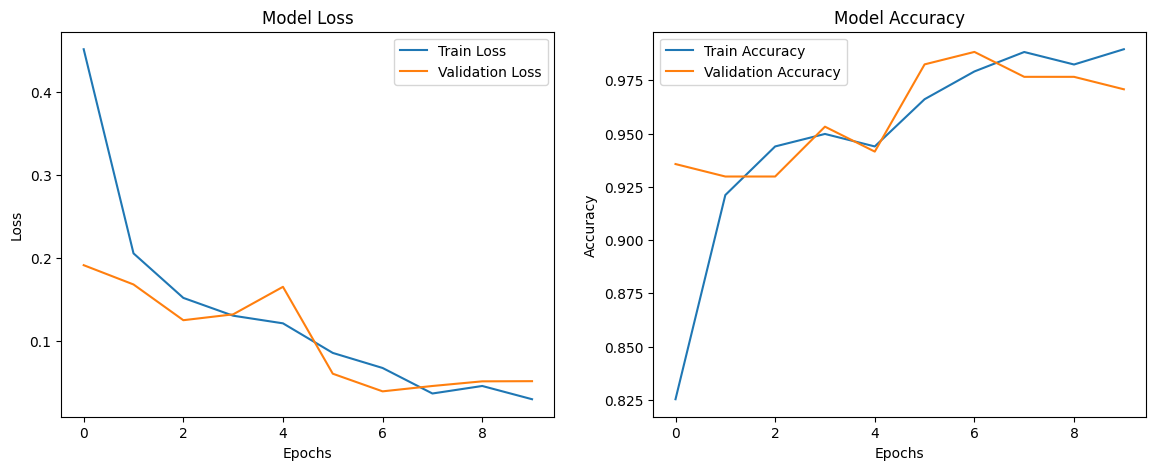

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, LayerNormalization, MultiHeadAttention, Dropout
from sklearn.model_selection import train_test_split
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("/content/emotions (2).csv")

def preprocess_data(data):
    label_mapping = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2}
    data_encoded = data.replace(label_mapping)


    X = data_encoded.drop(columns=['label'])
    y = data_encoded['label'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_onehot = to_categorical(y)

    # Reshape EEG signals for LSTM and Transformer
    num_channels = 32
    num_timesteps = X_scaled.shape[1] // num_channels
    if X_scaled.shape[1] % num_channels != 0:
        X_scaled = X_scaled[:, :(num_timesteps * num_channels)]
    X_reshaped = X_scaled.reshape(X_scaled.shape[0], num_timesteps, num_channels)

    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = preprocess_data(data)

# LSTM Layer
def create_lstm_layer(input_shape):
    inputs = Input(shape=input_shape)
    lstm_out = LSTM(256, return_sequences=True)(inputs)  # Return sequences for Transformer input
    return inputs, lstm_out
input_shape = (x_train.shape[1], x_train.shape[2])  # (timesteps, channels)
inputs, lstm_output = create_lstm_layer(input_shape)

# Transformer Encoder Layer
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Step 4: Build LSTM + Transformer Model
def build_lstm_transformer_model(input_shape):
    inputs, lstm_output = create_lstm_layer(input_shape)
    transformer_block = TransformerBlock(embed_dim=256, num_heads=4, ff_dim=256)
    transformer_output = transformer_block(lstm_output, training=True)

    flatten = tf.keras.layers.GlobalAveragePooling1D()(transformer_output)
    output = Dense(3, activation='softmax')(flatten)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
model = build_lstm_transformer_model(input_shape)
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=32)
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step


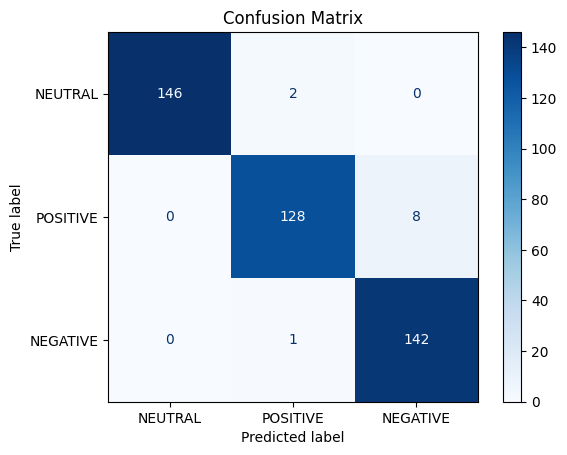

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NEUTRAL', 'POSITIVE', 'NEGATIVE'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_true, y_pred_classes)

# F1 Score
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Precision
precision = precision_score(y_true, y_pred_classes, average='macro')

# Recall
recall = recall_score(y_true, y_pred_classes, average='macro')

print(f"Cohen's Kappa Score: {kappa_score:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step
Cohen's Kappa Score: 0.8982
F1 Score: 0.9313
Precision: 0.9363
Recall: 0.9322


**ONLY CNN**

<ipython-input-19-1bd46f79c643>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(label_mapping)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7323 - loss: 0.8323 - val_accuracy: 0.9181 - val_loss: 0.4081
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8593 - loss: 0.5338 - val_accuracy: 0.8538 - val_loss: 0.3208
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9129 - loss: 0.2736 - val_accuracy: 0.9766 - val_loss: 0.1452
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9237 - loss: 0.2287 - val_accuracy: 0.9708 - val_loss: 0.1110
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9425 - loss: 0.1540 - val_accuracy: 0.9591 - val_loss: 0.1387
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9437 - loss: 0.1637 - val_accuracy: 0.9240 - val_loss: 0.1731
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9629 - loss: 0.0977 - val_accuracy: 0.9532 - val_loss: 0.0881
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9604 - loss: 0.1131 - val_accuracy: 0.9708 - v

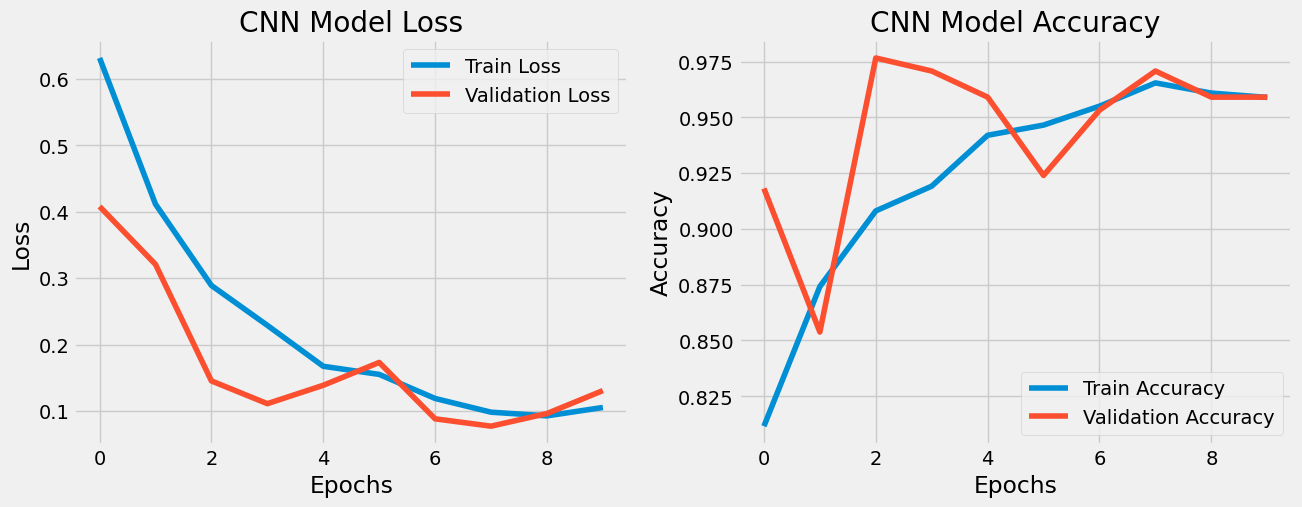

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/emotions (2).csv")

# Preprocessing
def preprocess_data(data):
    label_mapping = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2}
    data_encoded = data.replace(label_mapping)

    X = data_encoded.drop(columns=['label'])  # EEG signals
    y = data_encoded['label'].values  # Labels

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    y_onehot = to_categorical(y)

    # Reshape EEG signals for CNN
    num_channels = 32
    num_timesteps = X_scaled.shape[1] // num_channels

    if X_scaled.shape[1] % num_channels != 0:
        X_scaled = X_scaled[:, :(num_timesteps * num_channels)]

    X_reshaped = X_scaled.reshape(X_scaled.shape[0], num_timesteps, num_channels)

    x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = preprocess_data(data)

#CNN Model
def build_cnn_model(input_shape):
    inputs = Input(shape=input_shape)

    # First Convolutional Block
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second Convolutional Block
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Third Convolutional Block
    x = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Flatten and Dense Layers for classification
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(3, activation='softmax')(x)  # 3 classes: NEUTRAL, POSITIVE, NEGATIVE

    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
cnn_model = build_cnn_model((x_train.shape[1], x_train.shape[2]))
history = cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=32)
loss, accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**ONLY RNN**

<ipython-input-20-32f003953a01>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(label_mapping)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.6699 - loss: 0.8059 - val_accuracy: 0.9123 - val_loss: 0.3239
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8719 - loss: 0.4422 - val_accuracy: 0.9181 - val_loss: 0.2358
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9117 - loss: 0.2830 - val_accuracy: 0.9240 - val_loss: 0.2226
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9043 - loss: 0.2358 - val_accuracy: 0.9298 - val_loss: 0.2186
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9273 - loss: 0.2257 - val_accuracy: 0.9298 - val_loss: 0.1827
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9505 - loss: 0.1534 - val_accuracy: 0.9298 - val_loss: 0.1967
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9236 - loss: 0.1866 - val_accuracy: 0.9532 - val_loss: 0.1292
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9350 - loss: 0.1611 - val_accuracy: 0.9415 - 

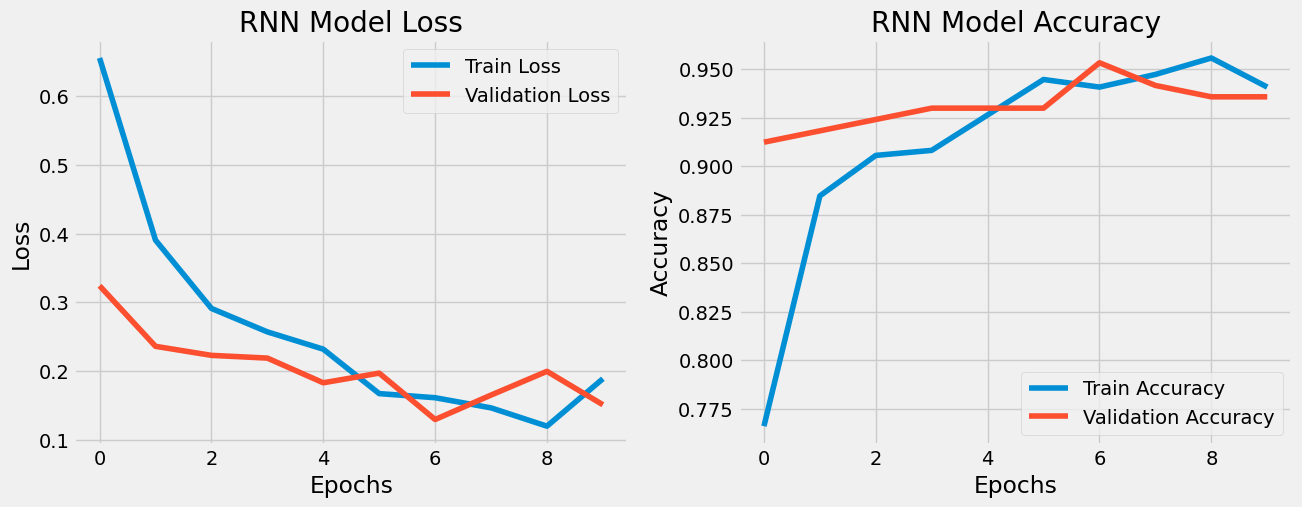

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/emotions (2).csv")

# Preprocessing the EEG Signals
def preprocess_data(data):
    label_mapping = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2}
    data_encoded = data.replace(label_mapping)

    X = data_encoded.drop(columns=['label'])
    y = data_encoded['label'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_onehot = to_categorical(y)

    # Reshaping
    num_channels = 32
    num_timesteps = X_scaled.shape[1] // num_channels

    if X_scaled.shape[1] % num_channels != 0:
        X_scaled = X_scaled[:, :(num_timesteps * num_channels)]

    X_reshaped = X_scaled.reshape(X_scaled.shape[0], num_timesteps, num_channels)

    x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = preprocess_data(data)

def build_rnn_model(input_shape):
    inputs = Input(shape=input_shape)

    # First RNN Layer
    x = SimpleRNN(128, return_sequences=True, activation='relu')(inputs)
    x = Dropout(0.3)(x)

    # Second RNN Layer
    x = SimpleRNN(128, return_sequences=False, activation='relu')(x)
    x = Dropout(0.3)(x)

    # Output Dense Layer for classification
    output = Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
rnn_model = build_rnn_model((x_train.shape[1], x_train.shape[2]))
history = rnn_model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=32)
loss, accuracy = rnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**ONLY LSTM**

<ipython-input-21-bca75ba0d468>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(label_mapping)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - accuracy: 0.7436 - loss: 0.6629 - val_accuracy: 0.8830 - val_loss: 0.2423
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.8908 - loss: 0.2616 - val_accuracy: 0.9123 - val_loss: 0.2132
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.9053 - loss: 0.2427 - val_accuracy: 0.9240 - val_loss: 0.2053
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.9218 - loss: 0.2204 - val_accuracy: 0.9123 - val_loss: 0.2013
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - accuracy: 0.9302 - loss: 0.1947 - val_accuracy: 0.9415 - val_loss: 0.1530
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - accuracy: 0.9390 - loss: 0.1666 - val_accuracy: 0.9357 - val_loss: 0.1491
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 293ms/step - accuracy: 0.9478 - loss: 0.1536 - val_accuracy: 0.9649 - val_loss: 0.1175
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - accuracy: 0.9679 - loss: 0.1077 - val_accu

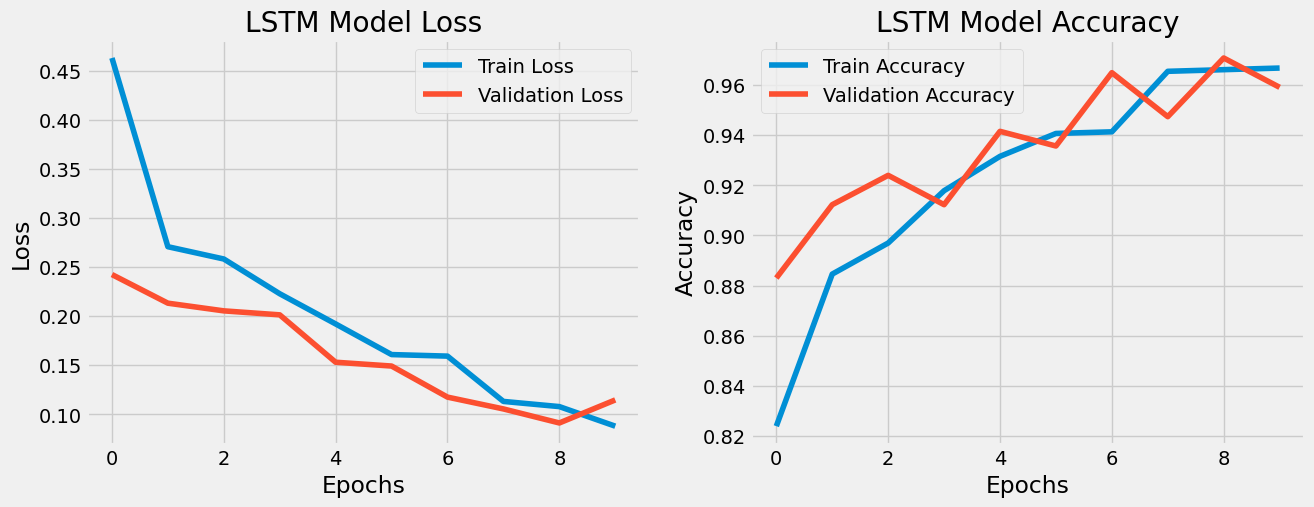

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/emotions (2).csv")

def preprocess_data(data):
    label_mapping = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2}
    data_encoded = data.replace(label_mapping)

    X = data_encoded.drop(columns=['label'])
    y = data_encoded['label'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    y_onehot = to_categorical(y)

    num_channels = 32
    num_timesteps = X_scaled.shape[1] // num_channels

    if X_scaled.shape[1] % num_channels != 0:
        X_scaled = X_scaled[:, :(num_timesteps * num_channels)]
    X_reshaped = X_scaled.reshape(X_scaled.shape[0], num_timesteps, num_channels)
    x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(data)

def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # First LSTM Layer
    x = LSTM(128, return_sequences=True)(inputs)
    x = Dropout(0.3)(x)

    # Second LSTM Layer
    x = LSTM(128, return_sequences=False)(x)
    x = Dropout(0.3)(x)

    output = Dense(3, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=output)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

lstm_model = build_lstm_model((x_train.shape[1], x_train.shape[2]))

history = lstm_model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

loss, accuracy = lstm_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


RNN Test Accuracy: 0.9461358189582825
LSTM Test Accuracy: 0.9484777450561523
LSTM+Transformer Test Accuracy: 0.9695550203323364


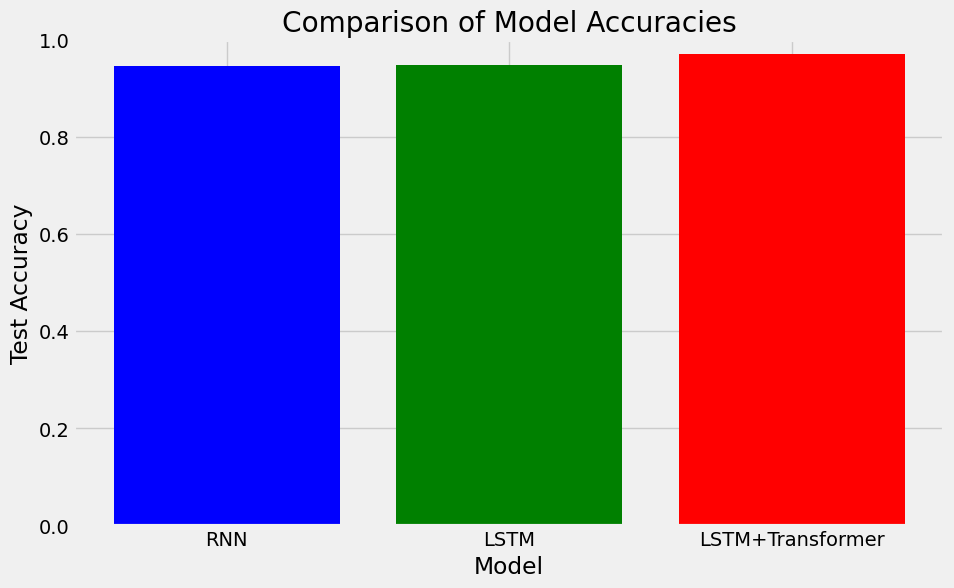

In [ ]:
import matplotlib.pyplot as plt
model_accuracies = {}

#  RNN model
rnn_model = build_rnn_model(input_shape=(x_train.shape[1], x_train.shape[2]))
rnn_model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=32, verbose=0)
_, rnn_accuracy = rnn_model.evaluate(x_test, y_test, verbose=0)
model_accuracies['RNN'] = rnn_accuracy
print(f"RNN Test Accuracy: {rnn_accuracy}")

#  LSTM model
lstm_model = build_lstm_model(input_shape=(x_train.shape[1], x_train.shape[2]))
lstm_model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=32, verbose=0)
_, lstm_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
model_accuracies['LSTM'] = lstm_accuracy
print(f"LSTM Test Accuracy: {lstm_accuracy}")


#  LSTM+Transformer model
lstm_transformer_model = build_lstm_transformer_model(input_shape=(x_train.shape[1], x_train.shape[2]))
lstm_transformer_model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=32, verbose=0)
_, lstm_transformer_accuracy = lstm_transformer_model.evaluate(x_test, y_test, verbose=0)
model_accuracies['LSTM+Transformer'] = lstm_transformer_accuracy
print(f"LSTM+Transformer Test Accuracy: {lstm_transformer_accuracy}")

# Plotting the accuracies for comparison
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Accuracy range between 0 and 1
plt.show()
